# Función transferencia pasabanda de segundo orden
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presenta un ejemplo de **análisis numérico y circuital** para un filtro pasabajo simple de segundo orden. También se aprovecha el mismo circuito para ejemplificar respecto a las funciones para el análisis de la respuesta en frecuencia:

* [analyze_sys](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.analyze_sys)
* [bodePlot](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.bodePlot)
* [pzmap](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pzmap)
* [pretty_print_bicuad_omegayq](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pretty_print_bicuad_omegayq)

De presentación algebraica

* [print_latex](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_latex)
* [a_equal_b_latex_s](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.a_equal_b_latex_s)


y las funciones para el dibujo de redes:

* [dibujar_elemento_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_elemento_derivacion)
* [dibujar_puerto_entrada](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_puerto_entrada)
* [dibujar_espacio_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_espacio_derivacion)
* [dibujar_elemento_serie](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_elemento_serie)
* [dibujar_puerto_salida](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_puerto_salida)


### Introducción

La función transferencia de un resonador, o filtro pasabanda de 2do orden como seguramente habrás visto en TC1 es:

<div style="text-align: center;"><img src="bpf_pasivo.png" alt="Circuito RLC pasabanda" ></div>


$$ H(s) = \frac{\frac{1}{R}}{\frac{1}{R} + sC + \frac{1}{sL} } = \frac{s\frac{1}{RC}}{s^2 + s\frac{1}{RC} + \frac{1}{LC}} $$

Buscaremos ahora una forma útil de parametrizar los polinomios de 2do orden, y en consecuencia las funciones transferencia. Será necesario que dichos parámetros guarden relación con aspectos concretos de la transferencia, como ser el ancho de banda y la frecuencia central del filtro. Se propone entonces la siguiente parametrización:

$$ T(s) = \frac{s \cdot \omega_0 / Q}{s^2 + s \cdot \omega_0 / Q + \omega_0^2} $$

Siendo los parámetros $\omega_0$ la pulsación natural de resonancia de la red. También nos referiremos a dicha pulsación como *frecuencia de resonancia, o de corte*. Si bien **no** es una frecuencia, en la jerga se usa de forma indistinta dado que solo media el factor de proporcionalidad $ 2 \pi $ entre ambas ($\omega_0 = 2\pi*f_0$).
Respecto al parámetro Q, veremos que está relacionado con el ancho de banda del filtro $ Q = \omega_0/B$. Para ello primero calcularemos el módulo de la respuesta en frecuencia del filtro.

Primero substituimos $ s = j\omega $:

$$ T(j\omega) = \frac{j\omega \cdot \omega_0 / Q}{(j\omega)^2 + j\omega \cdot \omega_0 / Q + \omega_0^2} $$

$$ T(j\omega) = \frac{j\omega \cdot \omega_0 / Q}{\omega_0^2 - \omega^2 + j\omega \cdot \omega_0 / Q} $$

y calculamos el módulo:

$$ |T(j\omega)| = \frac{\omega \cdot \omega_0 / Q}{\sqrt{(\omega_0^2 - \omega^2 )^2 + \left(\frac{\omega \cdot \omega_0}{Q}\right)^2}} $$

Esta función la podemos observar fácilmente en LTspice cuando analizamos la respuesta en frecuencia:


<div style="text-align: center;"><img src="bpf_respuesta_freq.png" alt="Circuito RLC pasabanda" ></div>


Como se puede ver en la respuesta de módulo, las pulsaciones $\omega_{1}$ y $\omega_{2}$ delimitan la banda de paso. Como es un pasabanda que en $\omega_0 = 2\pi.1\ \mathrm{Hz}$ tiene 0 dB, o $ |T(j\omega_0)| = 1 $, los límites de la banda de paso tendrán una ganancia de $ |T(j\omega_{1})| = |T(j\omega_{2})| = \sqrt{2}/2 $:

$$ |T(j\omega)| = \frac{\omega \cdot \omega_0 / Q}{\sqrt{(-\omega^2 + \omega_0^2)^2 + \left(\frac{\omega \cdot \omega_0}{Q}\right)^2}} = \frac{\sqrt{2}}{2} $$

Entonces despejamos los posibles valores de $ \omega $



$$ \left( \frac{\omega \cdot \omega_0 / Q}{\sqrt{(-\omega^2 + \omega_0^2)^2 + \left(\frac{\omega \cdot \omega_0}{Q}\right)^2}} \right)^2 = \left( \frac{\sqrt{2}}{2} \right)^2 $$

$$ \frac{(w \cdot \omega_0 / Q)^2}{(-w^2 + \omega_0^2)^2 + \left(\frac{w \cdot \omega_0}{Q}\right)^2} = \frac{1}{2} $$

Llegando a una ecuación cuadrática en $ \omega^2 $

$$ 0 = \omega^4 - \left(2\omega_0^2 + \frac{\omega_0^2}{Q^2}\right) \omega^2 + \omega_0^4 $$

Si $ x = \omega^2 $, entonces la ecuación cuadrática resulta:

$$ 0 = x^2 - \left(2\omega_0^2 + \frac{\omega_0^2}{Q^2}\right)x + \omega_0^4 $$

La solución para $\omega$ es:

$$ \omega_{1,2} = \frac{\omega_0(\sqrt{1 + 4Q^2} \pm 1)}{2Q} $$

Dichas frecuencias definen la banda de paso del filtro y cumplen con las siguientes restricciones:

$$ \omega_0^2 = \omega_1^2 . \omega_2^2 $$

$$ \omega_0/Q = B = \omega_2 - \omega_1 $$

Para el caso de nuestra simulación tendremos:

$$ \omega_{1,2} = \frac{2\pi\sqrt{5} \pm 1}{2} = 2\pi(1.118 \pm 0.5) = 2\pi.(0.618; 1.618)$$

$$ f_{1,2} = (0.618; 1.618) $$

Como se puede ver, ambas frecuencias no están equidistantes de $f_0 = 1$ Hz de forma euclídea, lo que equivaldría a que 1 Hz sea la media aritmética. En su lugar, $f_0$ es la media *geométrica*, que sería equivalente a la media aritmética, **solo** si el eje de frecuencias está *logaritmado*, como en la gráfica de más arriba.

Hecha esta introducción teórica se realizan los gráficos de la respuesta en frecuencia de módulo y fase para $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$, junto con el diagrama de polos y ceros. Éstos análisis reciben el nombre de *simulación numérica* de la respuesta en frecuencia de circuitos, o simplemente de ahora en adelante **simulación numérica**.

La simulación numérica consiste en simular el comportamiento de las expresiones matemáticas que modelan el comportamiento de un circuito, utilizando las capacidades de cálculo que brindan los módulos **Numpy** y **SciPy**. 

En el caso de este ejemplo, nos centraremos en analizar el comportamiento de la función *módulo*, *fase* y *retardo* de $H(s)$.

Todas las simulaciones comienzan con la inicialización y configuración de módulos numéricos y gráficos.

In [1]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

Ahora importamos las funciones de **PyTC2**

In [2]:

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s


Luego se procede a la simulación propiamente dicha

In [3]:
# Comienzo de la simulación

Q = np.sqrt(2)/2
w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# mostramos la transferencia construida
display(H1)

TransferFunctionContinuous(
array([1.]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)

Como se puede observar, luego de cargar el objeto *TransferFunction*, no es fácil volver a identificar los parámetros $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$ que lo originaron. Para ello se utilizará una función creada para tal fin de poder manifestar dicha parametrización:

\begin{equation}
H_d(s) = \frac{1 . \omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}


In [4]:
pretty_print_bicuad_omegayq(num,den)

# o un poco mejor, presentarlo como una ecuación:
print_latex(a_equal_b_latex_s('H_d(s)', pretty_print_bicuad_omegayq(num, den, displaystr=False)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

De esta manera la comparación visual se ve facilitada. Continuando con el análisis realizamos la simulación numérica de $H(s)$ propiamente

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

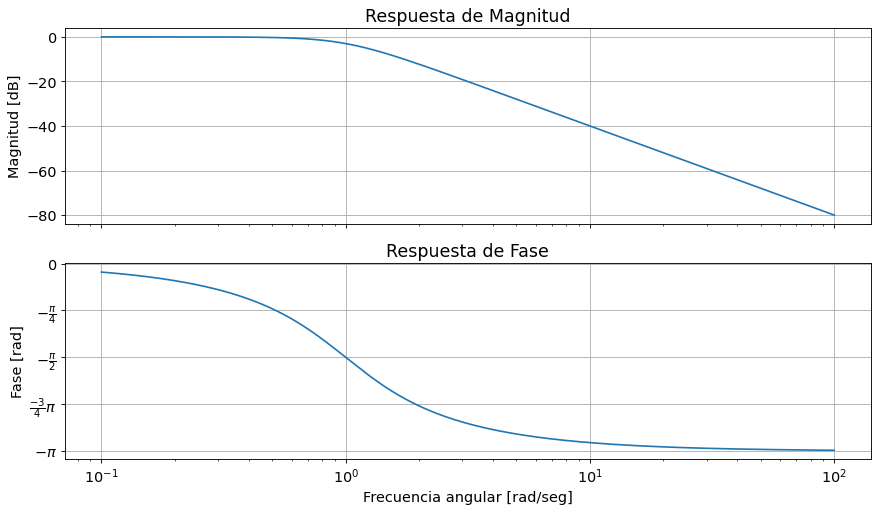

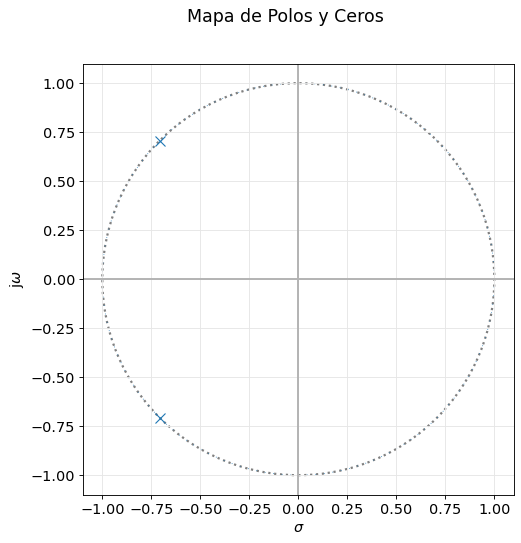

In [5]:
_, axes_hdl = bodePlot(H1)

plt.sca(axes_hdl[0])

pzmap(H1)

# Otra forma de analizar el sistema H1, con una función
# de más alto nivel. Podés probarlo si te interesa.
# analyze_sys(H1, sys_name='mi ejemplo')



otra manera de llegar al mismo resultado, con un poco más de detalle es a través de la función *analyze_sys*

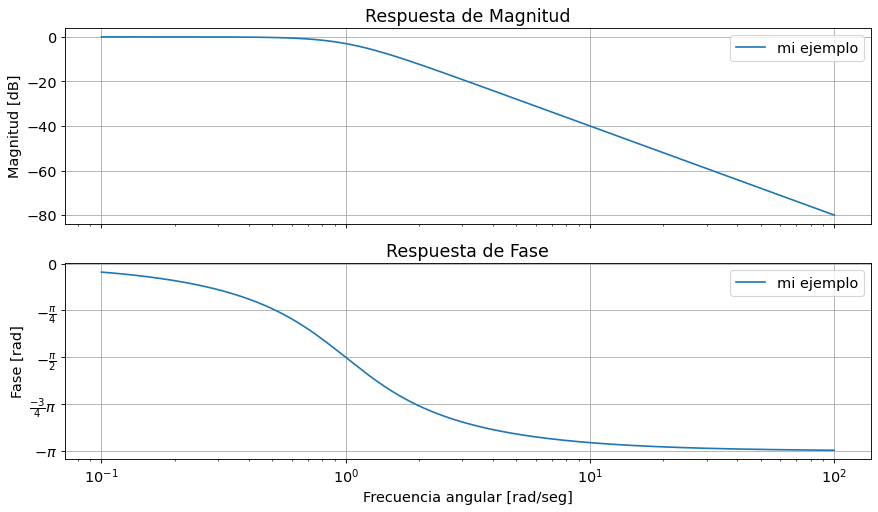

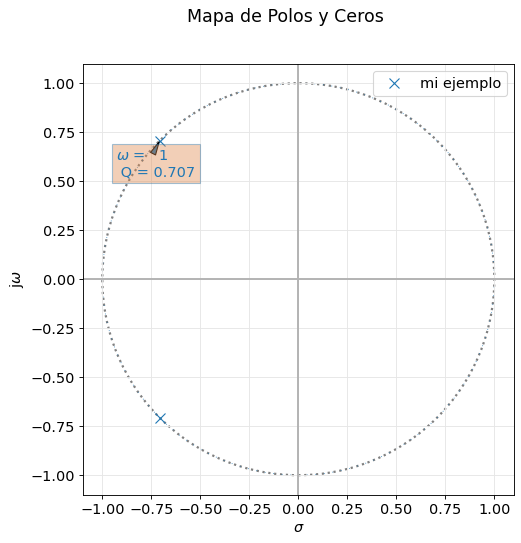

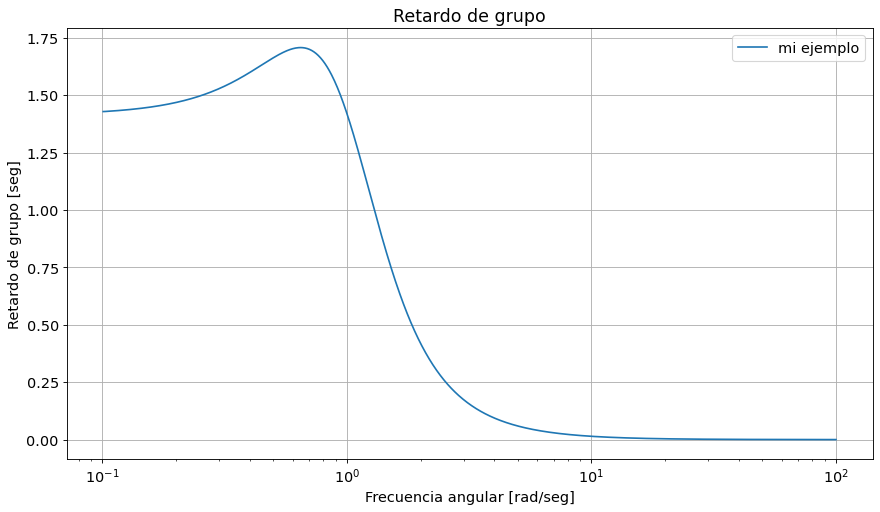

In [6]:
# Otra forma de analizar el sistema H1, con una función
# de más alto nivel. Podés probarlo si te interesa.

# el caracter "_" descarta la salida de la función
_ = analyze_sys([H1], sys_name='mi ejemplo')



ciertamente *analyze_sys* extiende el análisis de la respuesta en frecuencia al calcular el *retardo de grupo*; como también incorpora información al *diagrama de polos y ceros*, acerca del  $\omega_0$ y $Q$ asociado a cada singularidad (polo o cero) o par de singularidades complejas conjugadas. Se sugiere el uso de *analyze_sys* y será la **función de referencia de ahora en adelante**.

### Simulación Circuital

La simulación circuital se realizará con el software gratuito [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html). Para ello hay que dibujar el siguiente circuito:

![SOS_pasabajo_simple_circ.png](SOS_pasabajo_simple_circ.png)

Ejecutar el análisis de *AC sweep* configurado como se observa en la directiva *AC* visible en el circuito, e indicar que calcule la transferencia $V_2/V_1$

![SOS_pasabajo_simple_resp_frec.png](SOS_pasabajo_simple_resp_frec.png)

Como se puede observar, los resultados de la simulación circuital **coinciden** con la numérica. Recordar que en *LTspice* la respuesta en frecuencia es respecto a la frecuencia $f$, medida en (Hz), y no a la pulsación angular $\omega$ medida en radianes por segundo. Su relación es $\omega = 2.\pi. f$, y en consecuencia 1 r/s se corresponde con $1/(2\pi)$ Hz. 

Esto es evidencia suficiente para proceder a la siguiente instancia de diseño, que consiste en realizar un prototipo circuital, analizar las limitaciones prácticas de la implementación. Proceder al eventual rediseño, simulación y finalmente continuar con el diseño final y fabricación del circuito final.

## Apéndice

### Dibujo de circuitos

Finalmente se presenta una alternativa para el dibujo de circuitos eléctricos a partir de la propia librería **pyTC2**, que actúa como intérprete del módulo [schemdraw](https://schemdraw.readthedocs.io/en/latest/). La idea es dibujar la red de izquierda a derecha secuencialmente desde el generador $V_i$ hasta el puerto de salida $V_o$:

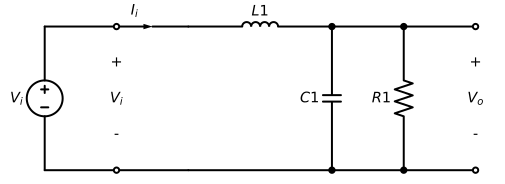

In [7]:
from schemdraw import Drawing
from pytc2.dibujar import dibujar_espacio_derivacion, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada
from pytc2.general import to_latex

d = Drawing(unit=4)
d = dibujar_elemento_derivacion(d, "V",  with_nodes=False, sym_label="V_i")
d = dibujar_espacio_derivacion(d)
d = dibujar_puerto_entrada(d, voltage_lbl=('+', to_latex('V_i'), '-'), current_lbl=to_latex('I_i'))
d = dibujar_elemento_serie(d, "L", sym_label="L1")
d = dibujar_elemento_derivacion(d, "C", sym_label="C1")
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, "R", sym_label="R1")
d = dibujar_puerto_salida(d, voltage_lbl=('+', to_latex('V_o'), '-'))
display(d)
